In [4]:
# import the required libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import deep learning libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # input layer + hidden layer + output layer

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing the data
# Importing the training data
x_train = np.loadtxt('/content/drive/MyDrive/input.csv', delimiter=',')
y_train = np.loadtxt('/content/drive/MyDrive/labels.csv', delimiter=',')

# Importing the testing data
x_test = np.loadtxt('/content/drive/MyDrive/input_test.csv', delimiter=',')
y_test = np.loadtxt('/content/drive/MyDrive/labels_test.csv', delimiter=',')

In [6]:
x_train

array([[ 37.,  39.,  25., ...,  58.,  54.,  29.],
       [131., 128., 135., ...,  71.,  96.,  74.],
       [ 80.,  92.,  88., ..., 124., 119.,  99.],
       ...,
       [231., 226., 230., ...,  62.,  65.,  72.],
       [ 61.,  61.,  63., ..., 135., 123., 123.],
       [ 64.,  31.,  12., ...,  61.,  49.,  35.]])

In [7]:
y_train

array([0., 0., 0., ..., 1., 1., 1.])

In [13]:
# Dimension of the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# (2000, 30000) --> 2000 images of each having 30000 columns, each column is a pixel

(400, 30000)
(400,)


In [10]:
2000*30000

60000000

In [18]:
# pixel values
print('Minimum pixel value:', x_train.min())
print('Maximum pixel value:', x_train.max())

# This represents the image can be RGB

Minimum pixel value: 0.0
Maximum pixel value: 255.0


In [17]:
# reshape the training data
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

# reshape the test data
x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

In [ ]:
# data after reshaping
print('Shape of the data after reshaping:')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Shape of the data after reshaping:
(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


In [19]:
# Data scaling
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train

In [ ]:
x_test

In [16]:
100*100*3

30000

In [14]:
30000/3

10000.0

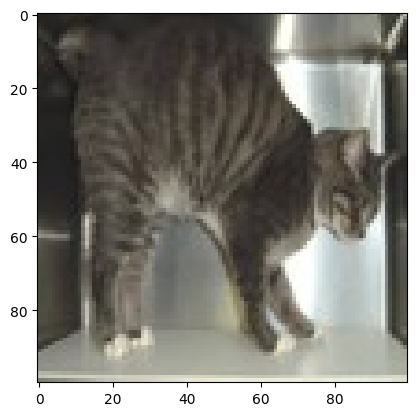

The target label is: [0.]


In [ ]:
# printing the first image
plt.imshow(x_train[1125, :])
plt.show()

# print the target for the first image
print('The target label is:', y_train[0])


In [ ]:
# This target label with the training image states 0 is dog 1 is cat


# --- DONT RUN THIS CELL --- #

# Traditional way of building the network
# model building
# model = Sequential()

# # First Conv Layer
# model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(100, 100, 3)))   # 32 - no.of.filters each of size 3x3
# model.MaxPooling2D((2,2))

# # Second Conv Layer
# model.add(Conv2D(32, (3, 3), activation = 'relu'))
# model.MaxPooling2D((2,2))

# # Flattening layer
# model.add(Flatten())

# # Fully connected layer
# # first dense layer
# model.add(Dense(70, activation='relu'))   # 70 neurons in the connecting layer
# # final output layer
# model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Conventional way
model = Sequential([
    # first conv layer
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2,2)),

    # second conv layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Flatter
    Flatten(),

    # First Dense layer
    Dense(70, activation='relu'),

    # Output layer
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [ ]:
# training the model with the data
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8497 - loss: 0.3540
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8457 - loss: 0.3592
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8407 - loss: 0.3608
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8618 - loss: 0.3296
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8507 - loss: 0.3387
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8605 - loss: 0.3263
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8720 - loss: 0.3115
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8665 - loss: 0.3068
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8740 - loss: 0.2895
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8737 - loss: 0.3002
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8721 - loss: 0.2903
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.879

In [ ]:
# evaluating the model
model.evaluate(x_test, y_test)

In [ ]:
# trainng data distribution of target
unique, counts = np.unique(y_train, return_counts=True)
print(unique, counts)

In [ ]:
len(x_test)

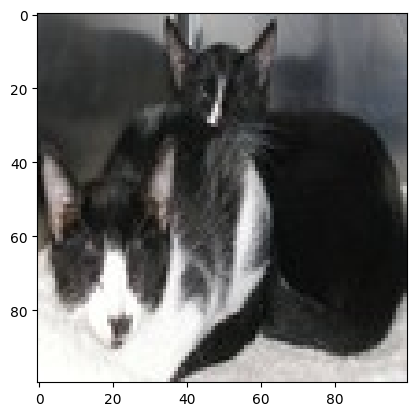

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
Prediction Probability: [[0.93735504]]
The actual image is: Cat
The model has predicted as: Cat


In [ ]:
# predictions
rdm_img = random.randint(0, len(x_test))
plt.imshow(x_test[rdm_img, :])
plt.show()

# actual condition
if y_test[rdm_img, :] == 0:
    actual = 'Dog'
else:
    actual = 'Cat'

# prediction for the given image
y_pred = model.predict(x_test[rdm_img, :].reshape(1, 100, 100, 3))
print('Prediction Probability:', y_pred)

if y_pred >= 0.5:
    pred = 'Cat'
else:
    pred = 'Dog'
print('The actual image is:', actual)
print('The model has predicted as:', pred)